#**Problem statement**
 Predicting the data trends.

 Predicting the trends of reviews after 2014.

In [16]:
### Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
#Importing required libraries
import pandas as pd                                                #for reading the file
import numpy as np                                                 #creating array of numbers

import matplotlib.pyplot as plt                                    #visualization and EDA
import seaborn as sns                                              #Visualizations of any graphs

from statsmodels.tsa.seasonal import seasonal_decompose            #find wheater trend or seasonality
from statsmodels.tsa.stattools import adfuller, acf,pacf           #checking data stationarity
from statsmodels.tsa.arima_model import ARIMA                      #ARMA model building
from sklearn.metrics import mean_squared_error                     #Finding the errors
import statsmodels.api as sm
# ACF and PACF charts
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf      #ACF and PACF graphs
# SARIMA/SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX             #SARIMA & SARIMAX model building
from pandas.tseries.offsets import DateOffset                      #Creating series of date 

import warnings
warnings.filterwarnings('ignore')                                  #Filtering the warnings 

###**Considering toys and games reviews datafile**

In [18]:
#Defining path for reviews of toys and games data file
path= '/content/drive/MyDrive/ML/Data/project/Review toys and games.csv'

#Using Pandas for reading csv file
review_toys= pd.read_csv(path, parse_dates=True, index_col='reviewTime') 
review_toys.head()

,Unnamed: 0,reviewerID,asin,reviewText,overall,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
reviewTime,,,,,,,,,
2014-01-29,0,A1VXOAVRGKGEAK,0439893577,like item pricing granddaughter wanted mark wa...,5,I like the item pricing. My granddaughter want...,I like the item pricing. My granddaughter want...,0.000000,Neutral
2014-03-28,1,A8R62G708TSCM,0439893577,love magnet easel great moving different areas...,4,Love the magnet easel... great for moving to d...,Love the magnet easel... great for moving to d...,0.433333,Positive
2013-01-28,2,A21KH420DK0ICA,0439893577,sides magnetic real plus youre entertaining ch...,5,Both sides are magnetic. A real plus when you...,Both sides are magnetic. A real plus when you...,0.300000,Positive
2014-02-08,3,AR29QK6HPFYZ4,0439893577,bought years ago daughter loves today holidays...,5,Bought one a few years ago for my daughter and...,Bought one a few years ago for my daughter and...,0.700000,Highly Positive
2014-05-05,4,ACCH8EOML6FN5,0439893577,stainless steel refrigerator space son play ma...,4,I have a stainless steel refrigerator therefor...,I have a stainless steel refrigerator therefor...,0.500000,Positive


In [19]:
review_toys[(review_toys.reviewAnalysis=='Negative')]

,Unnamed: 0,reviewerID,asin,reviewText,overall,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
reviewTime,,,,,,,,,
2011-06-24,14,A3AJWITG95EY0Q,0439893577,purchased melissa doug magnets went looking bo...,5,We had purchased Melissa & Doug magnets & had ...,We had purchased Melissa & Doug magnets & had ...,-0.110000,Negative
2013-10-29,27,A252DMIM13A3K7,048645195X,art nice coloring book find pages boring repet...,4,The art is nice in this coloring book. But I f...,The art is nice in this coloring book. But I f...,-0.272500,Negative
2013-11-27,32,A3Q8JZTT51HCHI,0545496470,waaaaay overpriced daughter wants think disapp...,2,Waaaaay overpriced for what you get. Daughter ...,Waaaaay overpriced for what you get. Daughter ...,-0.316667,Negative
2014-01-28,69,A3U6SWQW5ID7F5,073533305X,got disappointed thought complicated toddler i...,5,"When we first got it, I was disappointed as I ...","When we first got it, I was disappointed as I ...",-0.147500,Negative
2013-05-08,154,A35T7AVM3A5F4A,0786950072,thrilled find acquire finally husband grew lov...,5,We were thrilled to find Acquire finally; my h...,We were thrilled to find Acquire finally; my h...,-0.022083,Negative
...,...,...,...,...,...,...,...,...,...
2014-07-07,167490,A1GNYV0RA0EQSS,B00J49UTW2,thomas n play sets didnt wow factoror quality ...,3,I have several Thomas Take n' Play sets and th...,I have several Thomas Take n' Play sets and th...,-0.144286,Negative
2014-07-01,167493,A2W2E6BPPYZO0T,B00J49UTW2,boy hasn8217t thomas train fanatic maybe that8...,2,My boy hasn&#8217;t become a Thomas the Train ...,My boy hasn&#8217;t become a Thomas the Train ...,-0.026190,Negative
2014-07-20,167512,A33230MIA3W7G4,B00J49UTWC,fisher prices version little ponies popularity...,4,Fisher Price's version of My Little Ponies. W...,Fisher Price's version of My Little Ponies. W...,-0.025000,Negative


###Forecasting the trends based on Review_polarity.

In [20]:
#Dropping Unnamed column as it is not usefull for analysis
review_toys.drop(['Unnamed: 0'] ,axis=1, inplace=True)

In [21]:
#Duplicating the data
review_toys1=review_toys.copy()

#Shape of original dataset
review_toys.shape

(167597, 8)

After resampling the data into month-wise reviews, the data becomes biased.  As i'm taking mean values of polarity_scores all the values are becoming possitive, Hence there are no negative polarity scores. So, dividing the data into possitive_reviews and negative_reviews. 

###Seperating possitive reviews and negative reviews based on the polarity scores.

In [22]:
#Extracting only features with possitive polarity scores
review_toys[review_toys.reviewPolarity < 0 ] = np.nan        #Extracting polarity score less than 0 and filling with NaN values 
toys_possitive_reviews= review_toys.dropna()
print('Shape of possitive reviews of toys and games datafile: ',toys_possitive_reviews.shape)
toys_possitive_reviews.head()

Shape of possitive reviews of toys and games datafile:  (149842, 8)


,reviewerID,asin,reviewText,overall,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
reviewTime,,,,,,,,
2014-01-29,A1VXOAVRGKGEAK,0439893577,like item pricing granddaughter wanted mark wa...,5.0,I like the item pricing. My granddaughter want...,I like the item pricing. My granddaughter want...,0.000000,Neutral
2014-03-28,A8R62G708TSCM,0439893577,love magnet easel great moving different areas...,4.0,Love the magnet easel... great for moving to d...,Love the magnet easel... great for moving to d...,0.433333,Positive
2013-01-28,A21KH420DK0ICA,0439893577,sides magnetic real plus youre entertaining ch...,5.0,Both sides are magnetic. A real plus when you...,Both sides are magnetic. A real plus when you...,0.300000,Positive
2014-02-08,AR29QK6HPFYZ4,0439893577,bought years ago daughter loves today holidays...,5.0,Bought one a few years ago for my daughter and...,Bought one a few years ago for my daughter and...,0.700000,Highly Positive
2014-05-05,ACCH8EOML6FN5,0439893577,stainless steel refrigerator space son play ma...,4.0,I have a stainless steel refrigerator therefor...,I have a stainless steel refrigerator therefor...,0.500000,Positive


In [23]:
##Extracting only features with negative polarity scores
review_toys1[review_toys1.reviewPolarity >0 ] = np.nan           #Extracting polarity score greater than 0 and filling with NaN values 
toys_negative_reviews= review_toys1.dropna()
print('Shape of negative reviews of toys and games datafile: ',toys_negative_reviews.shape)
toys_negative_reviews.head()

Shape of negative reviews of toys and games datafile:  (21195, 8)


,reviewerID,asin,reviewText,overall,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
reviewTime,,,,,,,,
2014-01-29,A1VXOAVRGKGEAK,0439893577,like item pricing granddaughter wanted mark wa...,5.0,I like the item pricing. My granddaughter want...,I like the item pricing. My granddaughter want...,0.0000,Neutral
2011-06-24,A3AJWITG95EY0Q,0439893577,purchased melissa doug magnets went looking bo...,5.0,We had purchased Melissa & Doug magnets & had ...,We had purchased Melissa & Doug magnets & had ...,-0.1100,Negative
2013-12-31,ASVLLLS52G0A8,048645195X,coloring book provided hours creativity entert...,5.0,This coloring book has provided hours of creat...,This coloring book has provided hours of creat...,0.0000,Neutral
2013-08-03,AU21B5JSG23FQ,048645195X,pictures book detailed frustrating expecting d...,3.0,The pictures in this book are very detailed an...,The pictures in this book are very detailed an...,0.0000,Neutral
2013-10-29,A252DMIM13A3K7,048645195X,art nice coloring book find pages boring repet...,4.0,The art is nice in this coloring book. But I f...,The art is nice in this coloring book. But I f...,-0.2725,Negative


As the index column 'Review_Time' is not in order sorting the values in ascending order.

In [24]:
#Arranging the index column according to ascending order
toys_possitive_reviews1= toys_possitive_reviews.sort_values('reviewTime', ascending=True)
toys_negative_reviews1= toys_negative_reviews.sort_values('reviewTime', ascending=True)
toys_negative_reviews1

,reviewerID,asin,reviewText,overall,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
reviewTime,,,,,,,,
2000-09-30,A32JIQG3B1XX5I,B00000IUBJ,son 13 months plays lots cant turn jack pop en...,4.0,My son is 13 months and plays with it lots. He...,My son is 13 months and plays with it lots. He...,0.000000,Neutral
2000-10-10,A281NPSIMI1C2R,B00000IWCY,paper pen hand cross suspects knew longer susp...,5.0,"With paper and pen in hand, we would cross off...","With paper and pen in hand, we would cross off...",-0.145000,Negative
2000-11-20,A3TNM3C9ENUCFW,B00000DMFD,commercial makes look exciting kids fun game p...,3.0,"The commercial makes it look so exciting, and ...","The commercial makes it look so exciting, and ...",-0.040909,Negative
2000-11-22,A2TXMYYGSZCSZ1,B00004TZY8,dont deck uno cards time game great entire fam...,5.0,"If you don't own a deck of Uno cards, it's tim...","If you don't own a deck of Uno cards, it's tim...",-0.027610,Negative
2000-12-02,A3CDDXZ9WYJIQA,B00000IWI1,game stimulated children work hard creative st...,5.0,This game has really stimulated my children as...,This game has really stimulated my children as...,-0.012778,Negative
...,...,...,...,...,...,...,...,...
2014-07-22,A3M497WMNO4YJ,B00F58N6KI,dont glow,3.0,don't really glow well,don't really glow well Three Stars,0.000000,Neutral
2014-07-22,A2EU7LVM8UIFPJ,B00CANI9N0,grandaughter loves lil pony things cant inter ...,5.0,Grandaughter just loves her Lil Pony things sh...,Grandaughter just loves her Lil Pony things sh...,0.000000,Neutral
2014-07-22,AK8LRQAMSE3I7,B00IZEUFIA,typically like diverse components game cards c...,4.0,While I typically like more diverse components...,While I typically like more diverse components...,-0.084295,Negative


Data starts from 30-9-2000 to 22-7-2014.

Resampling the data converting data into monthly data.

In [25]:
#Resampling the data according to month wise
monthly_toys_possitive_reviews= toys_possitive_reviews1['asin'].resample('m').count()
monthly_toys_negative_reviews= toys_negative_reviews1['asin'].resample('m').count()
monthly_toys_possitive_reviews.head()

reviewTime
2000-07-31     1
2000-08-31     2
2000-09-30     3
2000-10-31    11
2000-11-30     5
Freq: M, Name: asin, dtype: int64

In [26]:
#defining the function for checking the stationary
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    if pvalue < 0.05:
        ret = print('pvalue= ',pvalue,"| Data is Stationary. Proceed to model building")
    else:
        ret = print('pvalue= ', pvalue,"| Data is not Stationary. Make is stationary")
        
    return(ret)


In [27]:
possitive_reviews= monthly_toys_possitive_reviews
negative_reviews=monthly_toys_negative_reviews

In [28]:
#Checking Stationary for possitive reviews of toys and games datafile
checkStationarity(possitive_reviews)

pvalue=  0.9955951625750452 | Data is not Stationary. Make is stationary


In [29]:
#Checking Stationary for negative reviews of toys and games datafile
checkStationarity(negative_reviews)

pvalue=  0.9974570959181569 | Data is not Stationary. Make is stationary


In [30]:
diff_possitive = possitive_reviews- possitive_reviews.shift()
diff_negative = negative_reviews- negative_reviews.shift()
diff_possitive.dropna(inplace=True)
diff_negative.dropna(inplace=True)
diff_possitive.head(3),diff_negative.head(3)

(reviewTime
 2000-08-31    1.0
 2000-09-30    1.0
 2000-10-31    8.0
 Freq: M, Name: asin, dtype: float64, reviewTime
 2000-10-31    0.0
 2000-11-30    1.0
 2000-12-31   -1.0
 Freq: M, Name: asin, dtype: float64)

In [31]:
#Checking Stationary for differenced possitive reviews of toys and games datafile
checkStationarity(diff_possitive)

pvalue=  0.01664188235940254 | Data is Stationary. Proceed to model building


In [32]:
#Checking Stationary for differenced negative reviews of toys and games datafile
checkStationarity(diff_negative)

pvalue=  0.02109704594571307 | Data is Stationary. Proceed to model building


In [33]:
#Function for checking seasonality of the data
def seasonality_check(text):
  reviews= text
  decomp= seasonal_decompose(reviews, period=12)

  d_trend= decomp.trend
  d_seasonal= decomp.seasonal
  d_residual= decomp.resid

   #plot the components
  fig,ax = plt.subplots(4,1,figsize=(20,15))

  plt.subplot(411) # rows=4,col=1,pos=1
  plt.plot(reviews,label="actual")
  plt.legend()

  plt.subplot(412)
  plt.plot(d_trend,label="Trend")
  plt.legend()

  plt.subplot(413)
  plt.plot(d_seasonal,label="Seasonal")
  plt.legend()

  plt.subplot(414)
  plt.plot(d_residual,label="Random")
  plt.legend()

  return

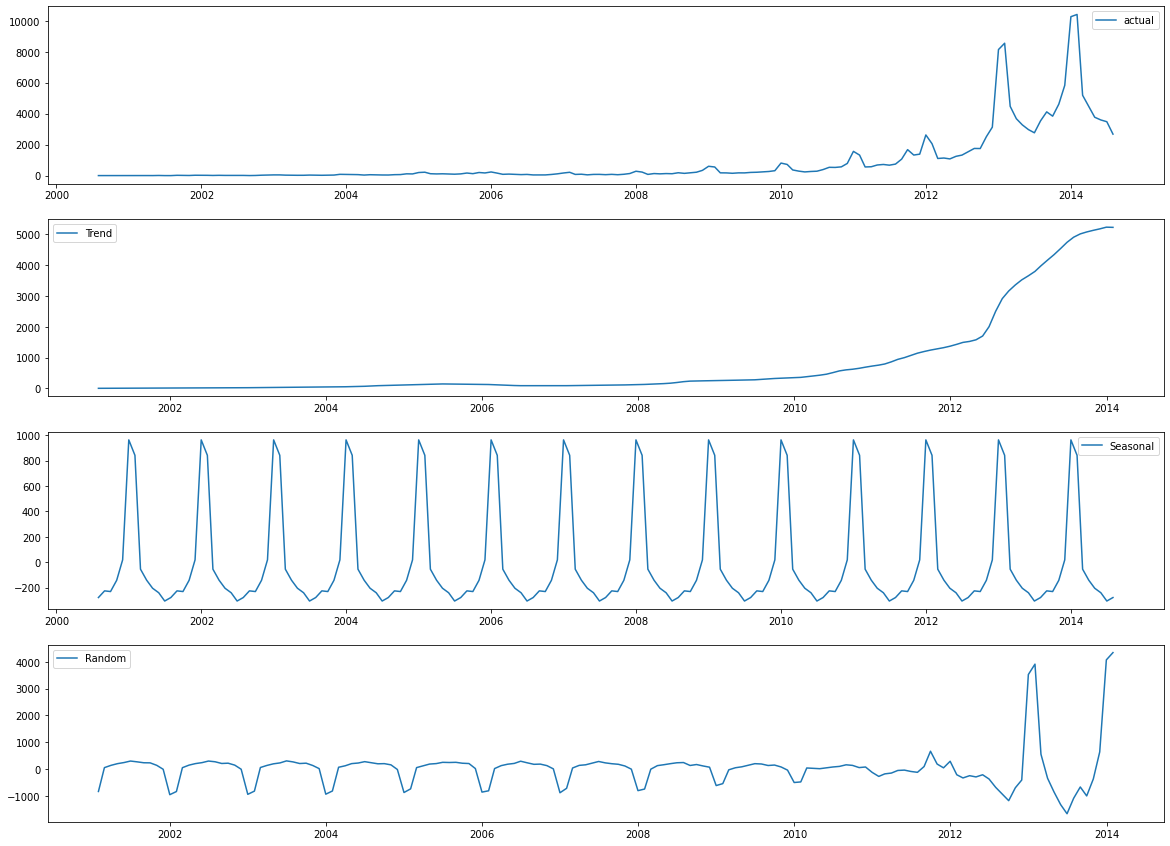

In [34]:
seasonality_check(possitive_reviews)

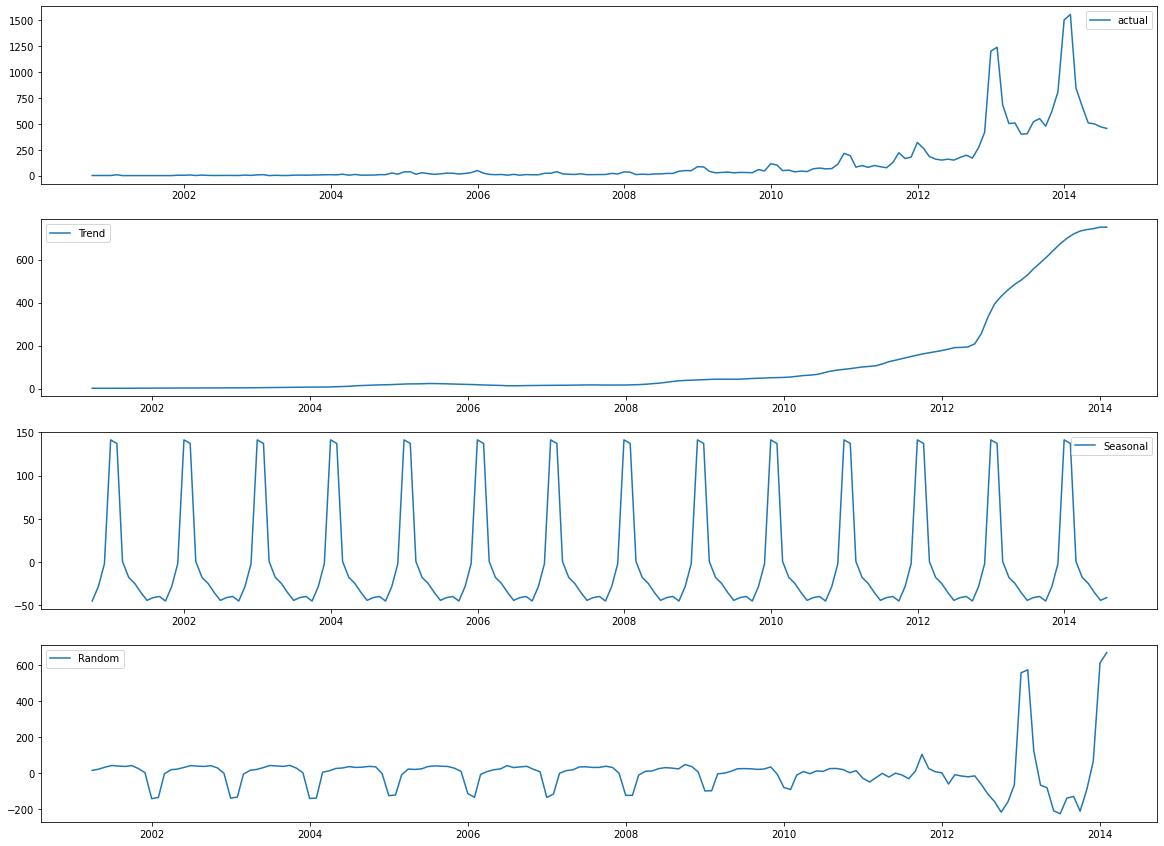

In [35]:
seasonality_check(negative_reviews)

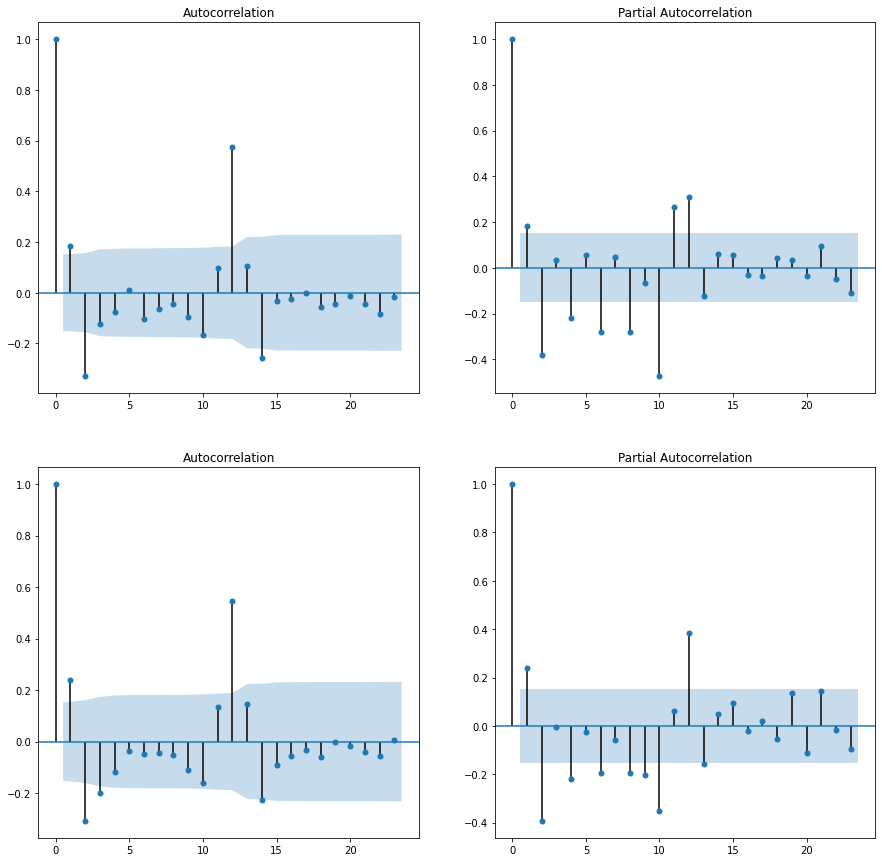

In [36]:
#Plotting ACF & PACF plots
fig,ax=plt.subplots(2,2,figsize=(15,15))
plot_acf(diff_possitive,ax=ax[0,0])
plot_pacf(diff_possitive,ax=ax[0,1])
plot_acf(diff_negative,ax=ax[1,0])
plot_pacf(diff_negative,ax=ax[1,1])
plt.show()

In [37]:
#Splitting data into train and test
train_pos=monthly_toys_possitive_reviews[(monthly_toys_possitive_reviews.index.year >= 2000) & (monthly_toys_possitive_reviews.index.year <= 2013)]
test_pos=monthly_toys_possitive_reviews[(monthly_toys_possitive_reviews.index.year > 2013)]

print('TRAIN={} | TEST={}'.format(len(train_pos), len(test_pos)))

TRAIN=162 | TEST=7


In [38]:
#Defining the SARIMA model
sarima = SARIMAX(train_pos,order=(2,0,2),seasonal_order=(2,0,2,12)).fit()

#Predicting train data
sarima_train_pred = sarima.predict(0,(len(train_pos)-1))

#Predicting for test data
sarima_test_pred = sarima.predict(len(train_pos),(len(train_pos)+len(test_pos)-1))
print(sarima.summary())
ljung3 = sm.stats.acorr_ljungbox(sarima.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(f'LJung Box Test Value : {ljung3}')

                                     SARIMAX Results                                      
Dep. Variable:                               asin   No. Observations:                  162
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 12)   Log Likelihood               -1210.276
Date:                            Wed, 14 Sep 2022   AIC                           2438.552
Time:                                    05:51:57   BIC                           2466.340
Sample:                                07-31-2000   HQIC                          2449.834
                                     - 12-31-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0307      0.188      0.163      0.870      -0.338       0.400
ar.L2          0.6792      0.084   

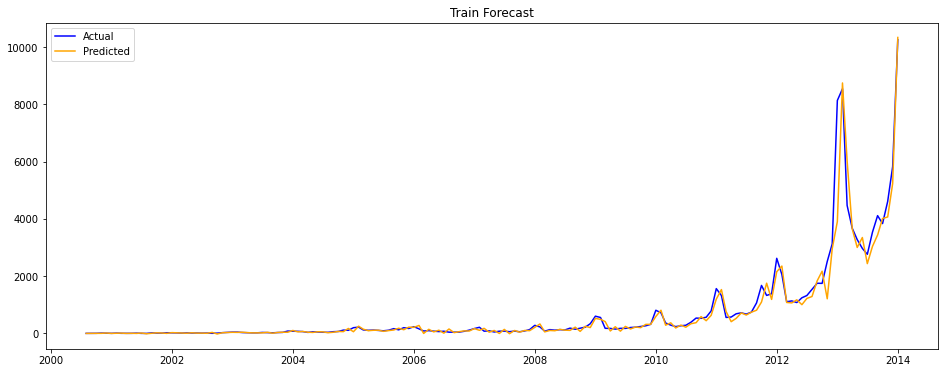

In [39]:
saim_train = pd.DataFrame({'Actual':train_pos,'Predicted':sarima_train_pred})
saim_test = pd.DataFrame({'Actual':test_pos,'Predicted':sarima_test_pred})
saim_train['Error']=saim_train['Actual']-saim_train['Predicted']
saim_test['Error']=saim_test['Actual']-saim_test['Predicted']
plt.figure(figsize=(16,6))
plt.plot(saim_train['Actual'],color='blue',label='Actual')
plt.plot(saim_train['Predicted'],color='orange',label='Predicted')
#plt.plot(saim_train['Error'],color='yellow',label='Error')
plt.title('Train Forecast')
plt.legend()

In [40]:
#creating future date as index
from pandas.tseries.offsets import DateOffset
future_date= [monthly_toys_possitive_reviews.index[-1]+DateOffset(months=x) for x in range(0,96)]

future_dataset= pd.DataFrame(index=future_date[1:])

#concating original data with future sales
future_df1= pd.concat([monthly_toys_possitive_reviews, future_dataset])

#Using SARIMA model for future forecast

#Forecasting sales after 2014
future_df1['forecast']= sarima.predict(start=len(monthly_toys_possitive_reviews)-5, end=len(future_df1))
future_df1

,0,forecast
2000-07-31,1.0,NaN
2000-08-31,2.0,NaN
2000-09-30,3.0,NaN
2000-10-31,11.0,NaN
2000-11-30,5.0,NaN
...,...,...
2022-02-28,NaN,1968.317006
2022-03-31,NaN,1634.770574
2022-04-30,NaN,1413.977323
2022-05-31,NaN,1247.574604


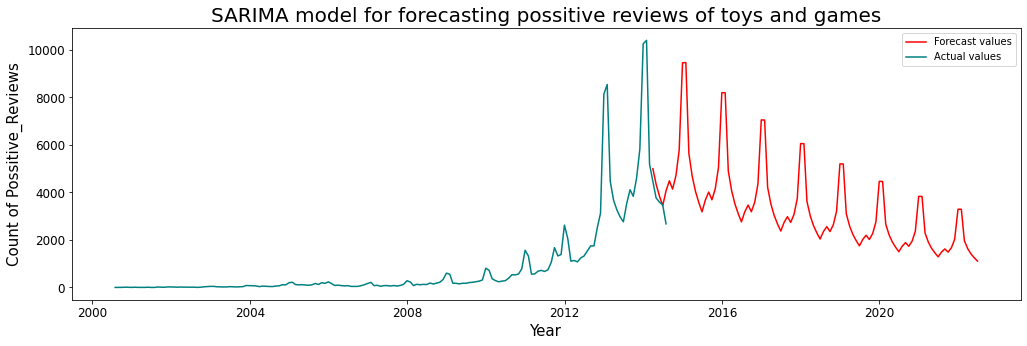

In [41]:
plt.figure(figsize=(17,5))
plt.plot(future_df1['forecast'],label= 'Forecast values', color='red')
plt.plot(future_df1[0],label= 'Actual values', color='teal')
plt.title('SARIMA model for forecasting possitive reviews of toys and games', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Possitive_Reviews', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 10)
plt.show();

In [42]:
#Splitting data into train and test
train_neg=monthly_toys_negative_reviews[(monthly_toys_negative_reviews.index.year >= 2000) & (monthly_toys_negative_reviews.index.year <= 2013)]
test_neg=monthly_toys_negative_reviews[(monthly_toys_negative_reviews.index.year > 2013)]

print('TRAIN={} | TEST={}'.format(len(train_neg), len(test_neg)))

TRAIN=160 | TEST=7


In [43]:
#Defining the SARIMA model
sarima1 = SARIMAX(train_neg,order=(5,0,3),seasonal_order=(5,0,3,12)).fit()

#Predicting train data
sarima_train_pred1 = sarima1.predict(0,(len(train_neg)-1))

#Predicting for test data
sarima_test_pred1 = sarima.predict(len(train_neg),(len(train_neg)+len(test_neg)-1))
print(sarima1.summary())
ljung3 = sm.stats.acorr_ljungbox(sarima1.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(f'LJung Box Test Value : {ljung3}')

                                     SARIMAX Results                                      
Dep. Variable:                               asin   No. Observations:                  160
Model:             SARIMAX(5, 0, 3)x(5, 0, 3, 12)   Log Likelihood                -900.155
Date:                            Wed, 14 Sep 2022   AIC                           1834.309
Time:                                    05:52:24   BIC                           1886.587
Sample:                                09-30-2000   HQIC                          1855.538
                                     - 12-31-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2408      0.231      1.042      0.297      -0.212       0.694
ar.L2          1.0684      0.173   

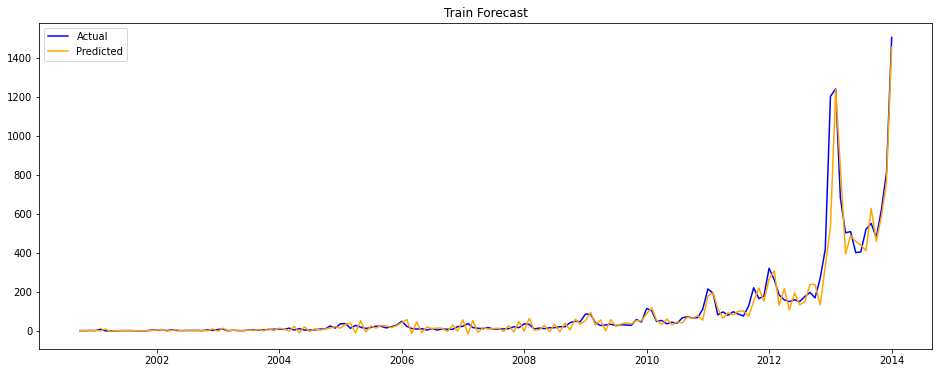

In [44]:
saim_train1 = pd.DataFrame({'Actual':train_neg,'Predicted':sarima_train_pred1})
saim_test1 = pd.DataFrame({'Actual':test_neg,'Predicted':sarima_test_pred1})
#saim_train['Error']=saim_train1['Actual']-saim_train1['Predicted']
#saim_test['Error']=saim_test['Actual']-saim_test['Predicted']
plt.figure(figsize=(16,6))
plt.plot(saim_train1['Actual'],color='blue',label='Actual')
plt.plot(saim_train1['Predicted'],color='orange',label='Predicted')
#plt.plot(saim_train['Error'],color='yellow',label='Error')
plt.title('Train Forecast')
plt.legend()

In [45]:
#creating future date as index
from pandas.tseries.offsets import DateOffset
future_date= [monthly_toys_negative_reviews.index[-1]+DateOffset(months=x) for x in range(0,96)]

future_dataset= pd.DataFrame(index=future_date[1:])

#concating original data with future sales
future_df1= pd.concat([monthly_toys_negative_reviews, future_dataset])

#Using SARIMA model for future forecast

#Forecasting sales after 2014
#Forecasting sales after 2014
future_df1['forecast']= sarima1.predict(start=len(monthly_toys_negative_reviews)-5, end=len(future_df1)+1)
future_df1

,0,forecast
2000-09-30,1.0,NaN
2000-10-31,1.0,NaN
2000-11-30,2.0,NaN
2000-12-31,1.0,NaN
2001-01-31,8.0,NaN
...,...,...
2022-02-28,NaN,1851.405382
2022-03-31,NaN,1836.018726
2022-04-30,NaN,1830.833378
2022-05-31,NaN,1823.555621


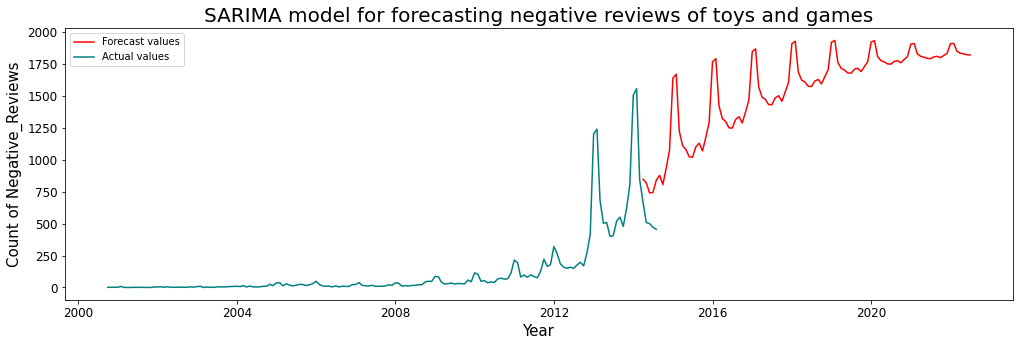

In [46]:
plt.figure(figsize=(17,5))
plt.plot(future_df1['forecast'],label= 'Forecast values', color='red')
plt.plot(future_df1[0],label= 'Actual values', color='teal')
plt.title('SARIMA model for forecasting negative reviews of toys and games', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Negative_Reviews', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 10)
plt.show();

###**Considering video_games dataset for future forecasting.**

In [47]:
#Defining path for reading the file
path= '/content/drive/MyDrive/ML/Data/project/video games.csv'

#Using pandas for reading the file
video_games= pd.read_csv(path, parse_dates=True, index_col='reviewTime')
video_games.head()

,Unnamed: 0,reviewerID,asin,Rating,review,cleantext,review_polarity,Review_sentiments
reviewTime,,,,,,,,
2012-07-09,0,A2HD75EMZR8QLN,0700099867,1,Installing the game was a struggle (because of...,installing game struggle games windows live bu...,-0.000189,Negative
2013-06-30,1,A3UR8NLLY1ZHCX,0700099867,4,If you like rally cars get this game you will ...,like rally cars game fun oriented european mar...,0.112500,Positive
2014-06-28,2,A1INA0F5CWW3J4,0700099867,1,1st shipment received a book instead of the ga...,st shipment received book instead game nd ship...,-0.171429,Negative
2011-09-14,3,A1DLMTOTHQ4AST,0700099867,3,"I got this version instead of the PS3 version,...",got version instead ps3 version turned mistake...,0.002019,Positive
2011-06-14,4,A361M14PU2GUEG,0700099867,4,I had Dirt 2 on Xbox 360 and it was an okay ga...,dirt xbox okay game started playing games lapt...,0.190795,Positive


In [48]:
#Dropping unnamed column as it is not usefull
video_games.drop('Unnamed: 0', axis=1,inplace=True)

In [49]:
#Duplicating the data
video_games1=video_games.copy()

#Shape of videogames dataframe
video_games.shape

(231780, 7)

In [50]:
#Extracting only features with possitive polarity scores
video_games[video_games.review_polarity <0 ] = np.nan     #Extracting and filling with NaN values of negative polarity_scores
vgames_possitive_reviews= video_games.dropna()
print('Shape of possitive_reviews of video_games dataset: ',vgames_possitive_reviews.shape)
vgames_possitive_reviews.head()

Shape of possitive_reviews of video_games dataset:  (184456, 7)


,reviewerID,asin,Rating,review,cleantext,review_polarity,Review_sentiments
reviewTime,,,,,,,
2013-06-30,A3UR8NLLY1ZHCX,0700099867,4.0,If you like rally cars get this game you will ...,like rally cars game fun oriented european mar...,0.112500,Positive
2011-09-14,A1DLMTOTHQ4AST,0700099867,3.0,"I got this version instead of the PS3 version,...",got version instead ps3 version turned mistake...,0.002019,Positive
2011-06-14,A361M14PU2GUEG,0700099867,4.0,I had Dirt 2 on Xbox 360 and it was an okay ga...,dirt xbox okay game started playing games lapt...,0.190795,Positive
2011-08-14,AN3YYDZAS3O1Y,0700099867,5.0,Loved playing Dirt 2 and I thought the graphic...,loved playing dirt thought graphics good purch...,0.345000,Positive
2012-11-14,A1QJJU33VNC4S7,0700099867,4.0,I initially gave this one star because it was ...,initially gave star crashing constantly recent...,0.040067,Positive


In [51]:
##Extracting only features with negative polarity scores
video_games1[video_games1.review_polarity >=0 ] = np.nan           #Extracting and filling with NaN values of possitive polarity_scores
vgames_negative_reviews= video_games1.dropna()
print('Shape of possitive_reviews of video_games dataset: ',vgames_negative_reviews.shape)
vgames_negative_reviews.head()

Shape of possitive_reviews of video_games dataset:  (47324, 7)


,reviewerID,asin,Rating,review,cleantext,review_polarity,Review_sentiments
reviewTime,,,,,,,
2012-07-09,A2HD75EMZR8QLN,0700099867,1.0,Installing the game was a struggle (because of...,installing game struggle games windows live bu...,-0.000189,Negative
2014-06-28,A1INA0F5CWW3J4,0700099867,1.0,1st shipment received a book instead of the ga...,st shipment received book instead game nd ship...,-0.171429,Negative
2013-05-11,A2UTRVO4FDCBH6,0700099867,4.0,"Overall this is a well done racing game, with ...",overall racing game good graphics time period ...,-0.089088,Negative
2012-11-24,AQTC623NCESZW,0700099867,1.0,I can't tell you what a piece of dog**** this ...,t tell piece dog game like microsoft makes doe...,-0.134470,Negative
2013-04-30,AFS6WERAP409A,0700099867,1.0,Crashed in Vista. Codemasters told me they do...,crashed vista codemasters told don t support w...,-0.200000,Negative


As the index column is not in order. Arranging them in order and sorting according to Ascending order.

In [52]:
#arranging the index column according to ascending order
vgames_possitive_reviews1= vgames_possitive_reviews.sort_values('reviewTime', ascending=True)
vgames_negative_reviews1= vgames_negative_reviews.sort_values('reviewTime', ascending=True)
vgames_possitive_reviews1.head()

,reviewerID,asin,Rating,review,cleantext,review_polarity,Review_sentiments
reviewTime,,,,,,,
1999-10-14,A2AXQTB83VMK4L,B0000296O5,5.0,I'm having the most fun I've ever had on PlayS...,m having fun ve playstation highly recommend b...,0.508750,Highly Positive
1999-11-10,AMGJMFJ63DWWH,B00001NFUA,5.0,Gabriel Knight wants to be a slacker and a wri...,gabriel knight wants slacker writerit turns de...,0.210628,Positive
1999-11-10,A3VWWQT4XDSBGQ,B00000K4AX,5.0,"If you loved Half-Life, this is a must buy. I ...",loved half-life buy big fpshooter fan ss2 like...,0.355000,Positive
1999-11-10,AMGJMFJ63DWWH,B000021XYY,4.0,"This game actually scared me a couple times, a...",game actually scared couple times witnessed su...,0.128205,Positive
1999-11-10,A1QA8K3LD9K892,B00000K1V2,2.0,Plodding first-person shooter with tons of fog...,plodding first-person shooter tons fog conceal...,0.021875,Positive


In [53]:
#Resampling the data according to month wise
monthly_vgames_possitive_reviews= vgames_possitive_reviews1['reviewerID'].resample('m').count()
monthly_vgames_negative_reviews= vgames_negative_reviews1['reviewerID'].resample('m').count()

#Checking for null values
monthly_vgames_negative_reviews.head()

reviewTime
1999-11-30     3
1999-12-31     4
2000-01-31    12
2000-02-29     8
2000-03-31    14
Freq: M, Name: reviewerID, dtype: int64

In [54]:
#Seasonality check for possitive reviews of Vgames dataset
possitive_reviews1= monthly_vgames_possitive_reviews
checkStationarity(possitive_reviews1)

pvalue=  0.9462751069454444 | Data is not Stationary. Make is stationary


In [55]:
#Seasonality check for possitive reviews of Vgames dataset
negative_reviews1= monthly_vgames_negative_reviews
checkStationarity(negative_reviews1)

pvalue=  0.8990445704808401 | Data is not Stationary. Make is stationary


In [56]:
diff_possitive1 = possitive_reviews1- possitive_reviews1.shift()
diff_negative1 = negative_reviews1- negative_reviews1.shift()
diff_possitive1.dropna(inplace=True)
diff_negative1.dropna(inplace=True)
diff_possitive1.head(3),diff_negative1.head(3)

(reviewTime
 1999-11-30    19.0
 1999-12-31    15.0
 2000-01-31     6.0
 Freq: M, Name: reviewerID, dtype: float64, reviewTime
 1999-12-31    1.0
 2000-01-31    8.0
 2000-02-29   -4.0
 Freq: M, Name: reviewerID, dtype: float64)

In [57]:
#Seasonality check for differenced possitive reviews of Vgames dataset
checkStationarity(diff_possitive1)

pvalue=  0.005597530201006992 | Data is Stationary. Proceed to model building


In [58]:
#Seasonality check for differenced negative reviews of Vgames dataset
checkStationarity(diff_negative1)

pvalue=  0.005823639573275304 | Data is Stationary. Proceed to model building


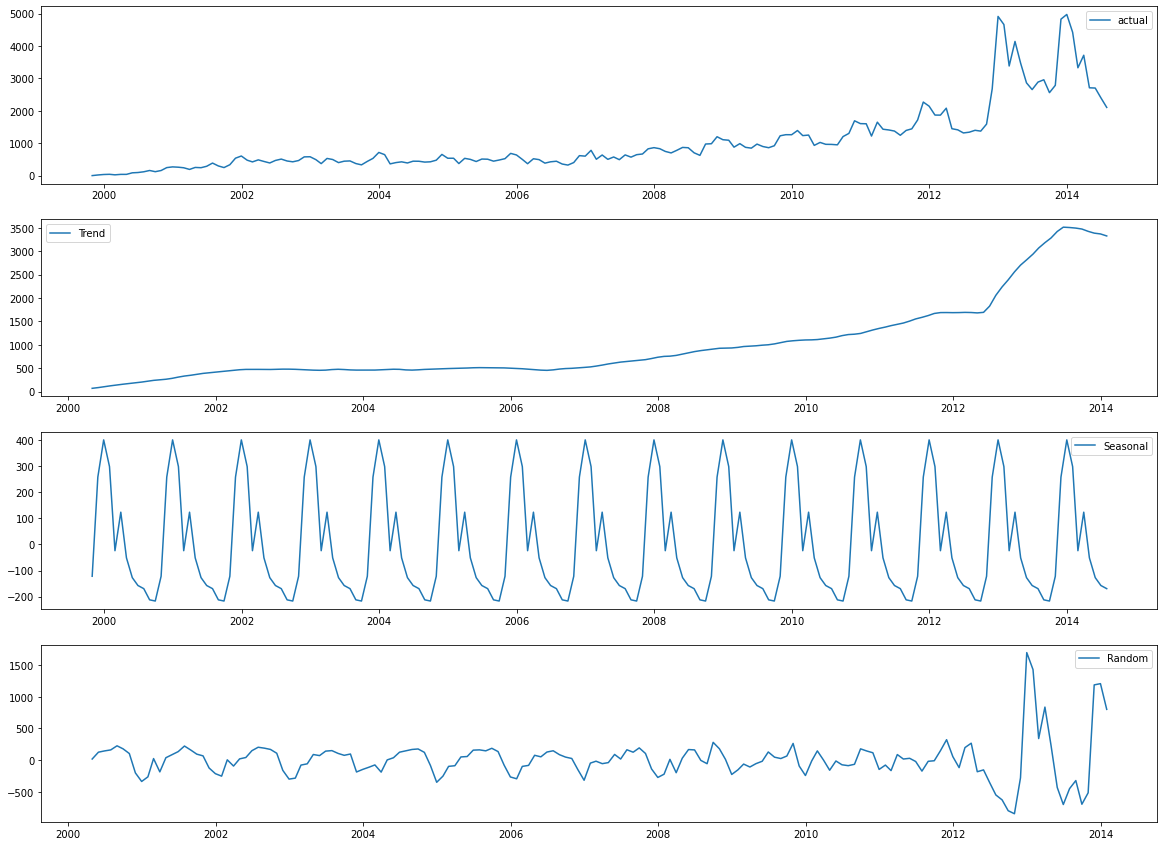

In [59]:
#Seasonality check for possitive reviews of vgames data
seasonality_check(possitive_reviews1)

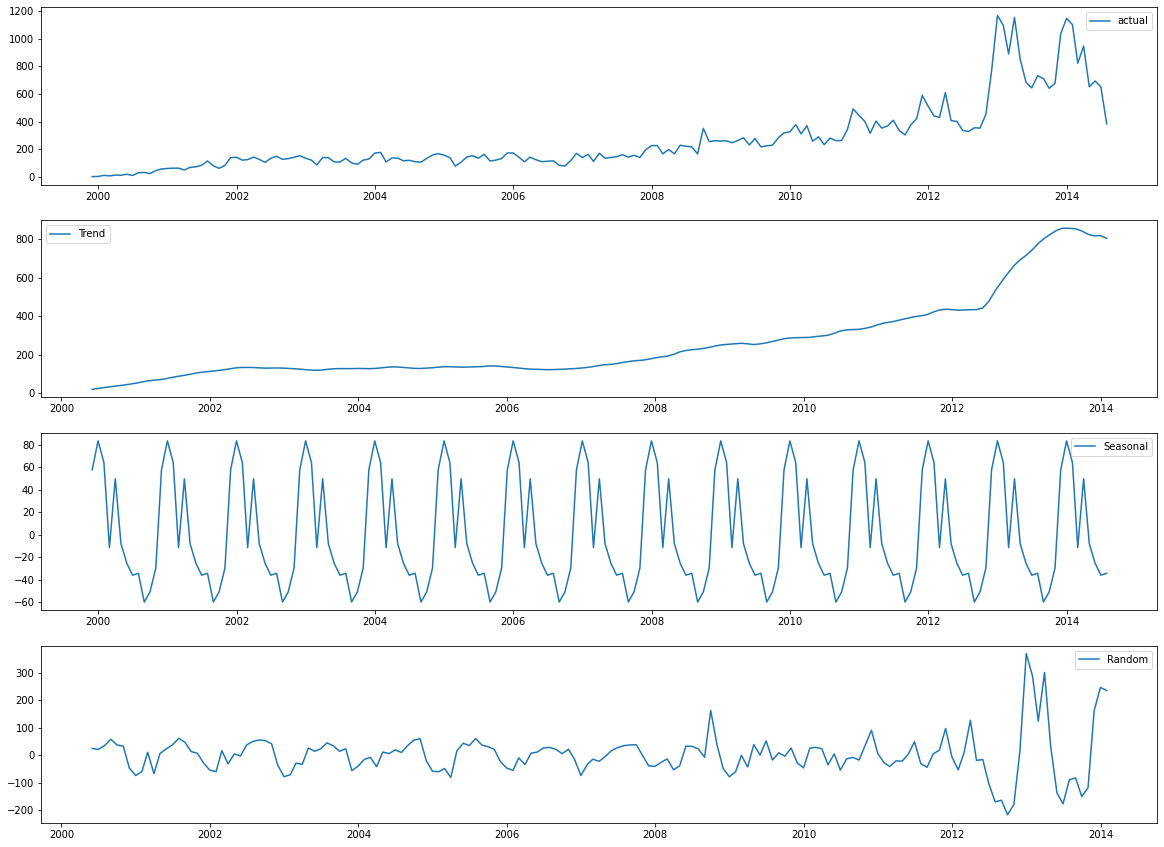

In [60]:
#Seasonality check for negative reviews of vgames data
seasonality_check(negative_reviews1)

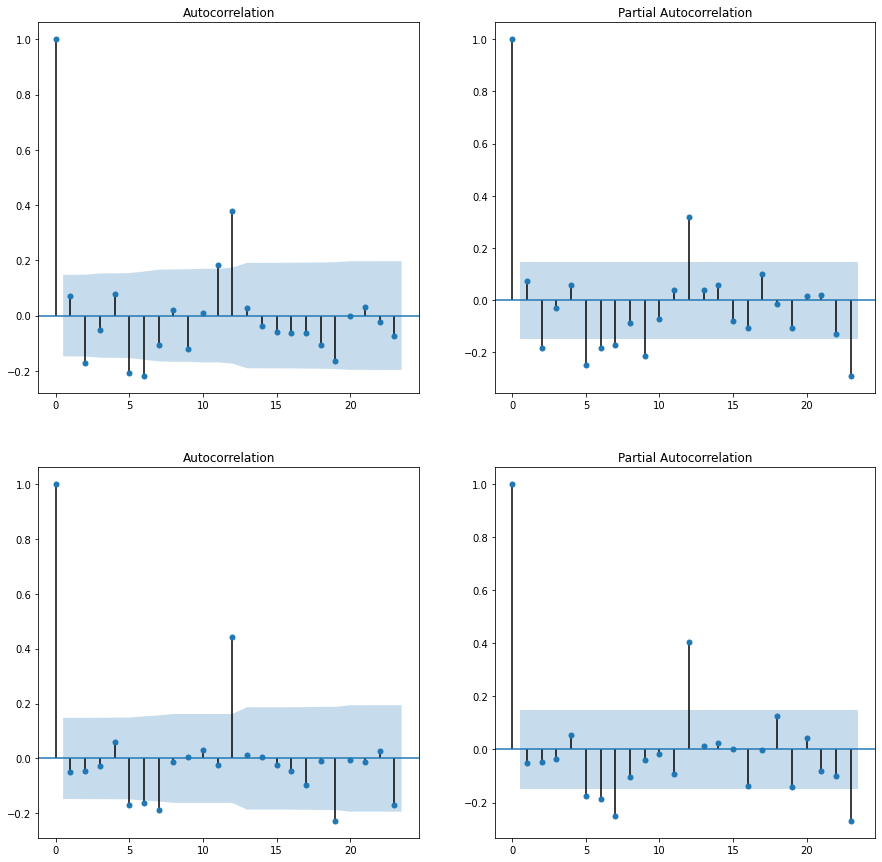

In [61]:
#Plotting ACF & PACF plots for finding optimum value of P & Q
fig,ax=plt.subplots(2,2,figsize=(15,15))
plot_acf(diff_possitive1,ax=ax[0,0])
plot_pacf(diff_possitive1,ax=ax[0,1])
plot_acf(diff_negative1,ax=ax[1,0])
plot_pacf(diff_negative1,ax=ax[1,1])
plt.show()

In [62]:
#Splitting the Vgames possitive data into train and test
train_pos1=monthly_vgames_possitive_reviews[(monthly_vgames_possitive_reviews.index.year >= 2000) & (monthly_vgames_possitive_reviews.index.year <= 2013)]
test_pos1=monthly_vgames_possitive_reviews[(monthly_vgames_possitive_reviews.index.year > 2013)]

print('TRAIN={} | TEST={}'.format(len(train_pos1), len(test_pos1)))

TRAIN=168 | TEST=7


In [63]:
#Defining the SARIMA model
sarima2 = SARIMAX(train_pos1,order=(2,0,3),seasonal_order=(2,0,3,12)).fit()

#Predicting train data
sarima_train_pred2 = sarima2.predict(0,(len(train_pos1)-1))

#Predicting for test data
sarima_test_pred2 = sarima2.predict(len(train_pos1),(len(train_pos1)+len(test_pos1)-1))
print(sarima2.summary())
ljung3 = sm.stats.acorr_ljungbox(sarima2.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(f'LJung Box Test Value : {ljung3}')

                                     SARIMAX Results                                      
Dep. Variable:                         reviewerID   No. Observations:                  168
Model:             SARIMAX(2, 0, 3)x(2, 0, 3, 12)   Log Likelihood               -1175.769
Date:                            Wed, 14 Sep 2022   AIC                           2373.539
Time:                                    05:52:45   BIC                           2407.902
Sample:                                01-31-2000   HQIC                          2387.485
                                     - 12-31-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9756      1.476      1.339      0.181      -0.917       4.868
ar.L2         -0.9758      1.449   

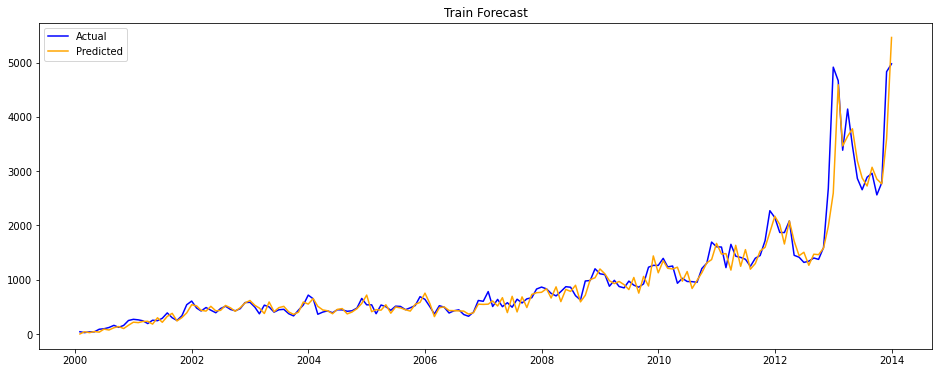

In [64]:
saim_train2 = pd.DataFrame({'Actual':train_pos1,'Predicted':sarima_train_pred2})
saim_test2 = pd.DataFrame({'Actual':test_pos1,'Predicted':sarima_test_pred2})
#saim_train['Error']=saim_train2['Actual']-saim_train2['Predicted']
#saim_test['Error']=saim_test2['Actual']-saim_test2['Predicted']
plt.figure(figsize=(16,6))
plt.plot(saim_train2['Actual'],color='blue',label='Actual')
plt.plot(saim_train2['Predicted'],color='orange',label='Predicted')
#plt.plot(saim_train['Error'],color='yellow',label='Error')
plt.title('Train Forecast')
plt.legend()

In [65]:
#creating future date as index
future_date= [monthly_vgames_possitive_reviews.index[-1]+DateOffset(months=x) for x in range(0,96)]

future_dataset= pd.DataFrame(index=future_date[1:])

#concating original data with future sales
future_df1= pd.concat([monthly_vgames_possitive_reviews, future_dataset])

#Using SARIMA model for future forecast

#Forecasting sales after 2014
#Forecasting sales after 2014
future_df1['forecast']= sarima2.predict(start=len(monthly_vgames_possitive_reviews)-5, end=len(future_df1)+1)
future_df1

,0,forecast
1999-10-31,1.0,NaN
1999-11-30,20.0,NaN
1999-12-31,35.0,NaN
2000-01-31,41.0,NaN
2000-02-29,25.0,NaN
...,...,...
2022-02-28,NaN,3122.962808
2022-03-31,NaN,3182.506722
2022-04-30,NaN,2991.361975
2022-05-31,NaN,2834.434227


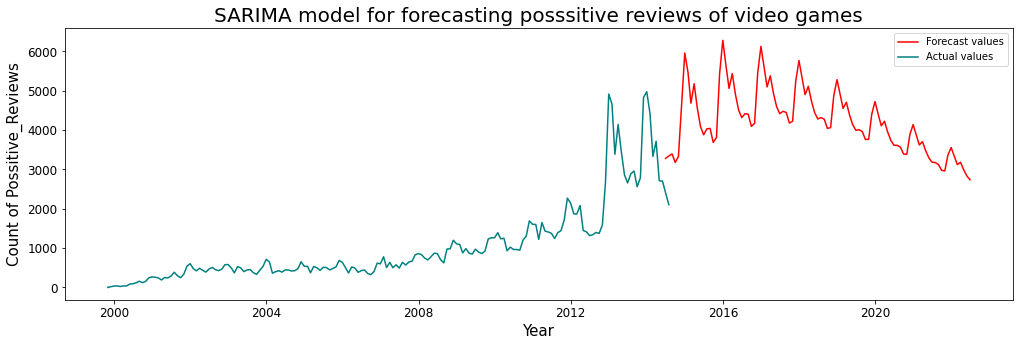

In [66]:
plt.figure(figsize=(17,5))
plt.plot(future_df1['forecast'],label= 'Forecast values', color='red')
plt.plot(future_df1[0],label= 'Actual values', color='teal')
plt.title('SARIMA model for forecasting posssitive reviews of video games', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Possitive_Reviews', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 10)
plt.show();

In [67]:
#Splitting the Vgames possitive data into train and test
train_neg1=monthly_vgames_negative_reviews[(monthly_vgames_negative_reviews.index.year >= 2000) & (monthly_vgames_negative_reviews.index.year <= 2013)]
test_neg1=monthly_vgames_negative_reviews[(monthly_vgames_negative_reviews.index.year > 2013)]

print('TRAIN={} | TEST={}'.format(len(train_neg1), len(test_neg1)))

TRAIN=168 | TEST=7


In [68]:
#Defining the SARIMA model
sarima3 = SARIMAX(train_neg1,order=(2,0,2),seasonal_order=(2,0,2,12)).fit()

#Predicting train data
sarima_train_pred3 = sarima3.predict(0,(len(train_neg1)-1))

#Predicting for test data
sarima_test_pred3 = sarima3.predict(len(train_neg1),(len(train_neg1)+len(test_neg1)-1))
print(sarima2.summary())
ljung3 = sm.stats.acorr_ljungbox(sarima3.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(f'LJung Box Test Value : {ljung3}')

                                     SARIMAX Results                                      
Dep. Variable:                         reviewerID   No. Observations:                  168
Model:             SARIMAX(2, 0, 3)x(2, 0, 3, 12)   Log Likelihood               -1175.769
Date:                            Wed, 14 Sep 2022   AIC                           2373.539
Time:                                    05:52:48   BIC                           2407.902
Sample:                                01-31-2000   HQIC                          2387.485
                                     - 12-31-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9756      1.476      1.339      0.181      -0.917       4.868
ar.L2         -0.9758      1.449   

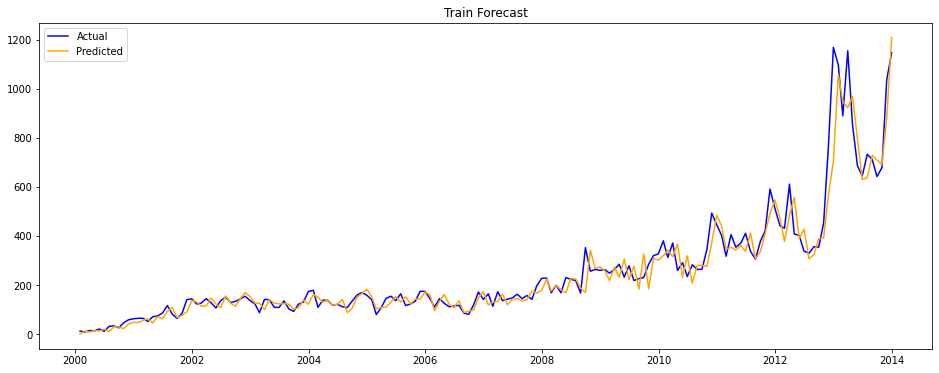

In [69]:
saim_train3 = pd.DataFrame({'Actual':train_neg1,'Predicted':sarima_train_pred3})
saim_test3 = pd.DataFrame({'Actual':test_neg1,'Predicted':sarima_test_pred3})
#saim_train['Error']=saim_train3['Actual']-saim_train3['Predicted']
#saim_test['Error']=saim_test3['Actual']-saim_test3['Predicted']
plt.figure(figsize=(16,6))
plt.plot(saim_train3['Actual'],color='blue',label='Actual')
plt.plot(saim_train3['Predicted'],color='orange',label='Predicted')
#plt.plot(saim_train['Error'],color='yellow',label='Error')
plt.title('Train Forecast')
plt.legend()

In [70]:
#creating future date as index
future_date= [monthly_vgames_negative_reviews.index[-1]+DateOffset(months=x) for x in range(0,96)]

future_dataset= pd.DataFrame(index=future_date[1:])

#concating original data with future sales
future_df1= pd.concat([monthly_vgames_negative_reviews, future_dataset])

#Using SARIMA model for future forecast

#Forecasting sales after 2014
#Forecasting sales after 2014
future_df1['forecast']= sarima3.predict(start=len(monthly_vgames_negative_reviews)-5, end=len(future_df1)+1)
future_df1

,0,forecast
1999-11-30,3.0,NaN
1999-12-31,4.0,NaN
2000-01-31,12.0,NaN
2000-02-29,8.0,NaN
2000-03-31,14.0,NaN
...,...,...
2022-02-28,NaN,584.536503
2022-03-31,NaN,637.880279
2022-04-30,NaN,564.139397
2022-05-31,NaN,520.463605


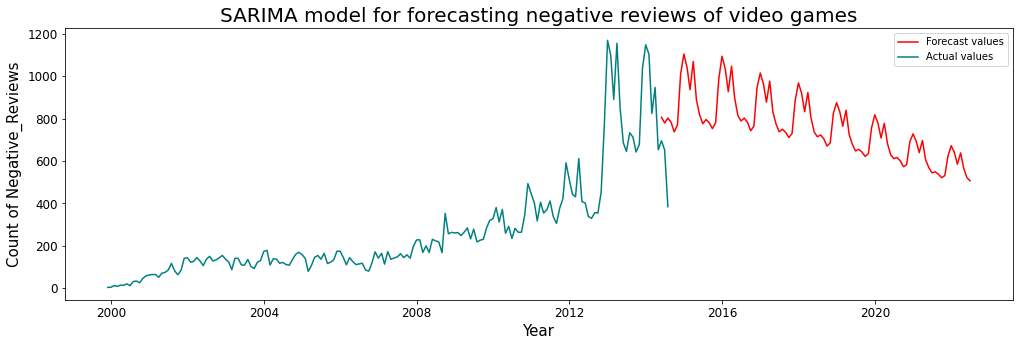

In [71]:
plt.figure(figsize=(17,5))
plt.plot(future_df1['forecast'],label= 'Forecast values', color='red')
plt.plot(future_df1[0],label= 'Actual values', color='teal')
plt.title('SARIMA model for forecasting negative reviews of video games', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Negative_Reviews', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 10)
plt.show()

#**Analysis**

In [72]:
possitive_reviews_df= pd.DataFrame(possitive_reviews)
possitive_reviews_df['category']='Toys and Games'
possitive_reviews_df.head(3)

,asin,category
reviewTime,,
2000-07-31,1,Toys and Games
2000-08-31,2,Toys and Games
2000-09-30,3,Toys and Games


In [73]:
possitive_reviews_df1= pd.DataFrame(possitive_reviews1)
possitive_reviews_df1['category']='Video Games'
possitive_reviews_df1.head(3)

,reviewerID,category
reviewTime,,
1999-10-31,1,Video Games
1999-11-30,20,Video Games
1999-12-31,35,Video Games


In [74]:
df=pd.concat([possitive_reviews_df,possitive_reviews_df1],axis=0)

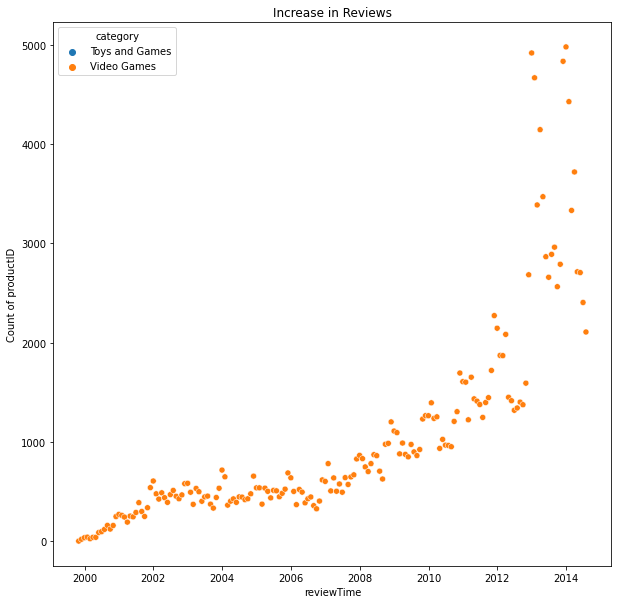

In [75]:
fig=plt.subplots(figsize=(10,10))
sns.scatterplot(x=df.index ,y=df.reviewerID,hue=df.category)
plt.ylabel('Count of productID')
plt.title('Increase in Reviews')
plt.show()